In [1]:
# packages used in this tutorial 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# keras is only to get boston housing data
# boston housing is also here: from sklearn.datasets import load_boston
#import tensorflow as tf
from tensorflow import keras

# gradient boosting 
from xgboost import XGBRegressor

# random forest
from sklearn.ensemble import RandomForestRegressor

# evaluation metrics
from sklearn.metrics import mean_squared_error

C:\Anaconda\envs\phoenix\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\envs\phoenix\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\envs\phoenix\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\envs\phoenix\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
phoenix = pd.read_csv('final_summer_16_only_buildings.csv')

phoenix = pd.get_dummies(phoenix)
phoenix.iloc[:,0:].head()

,FID,dist_center,CBG_area,temp,ndvi,Max_Area_Single_Building,AREA_M2,AVGHT_M,MAXHT_M,High Density Percentage,...,Median HH Income,Population Density,Percent Renter,Imperviousness,ROOFTYPE_Complex,ROOFTYPE_Flat,ROOFTYPE_Pitched,Max_Building_Area_Rooftype_Complex,Max_Building_Area_Rooftype_Flat,Max_Building_Area_Rooftype_Pitched
0,6,23133.721050,1.247750e+06,50.051790,0.218881,5417.874,134844.492,3.504549,23.37,0.05,...,29738,2611.323360,0.391453,0.62,0,1,0,0,1,0
1,7,23527.866880,1.103573e+06,51.547895,0.126049,2035.870,142041.843,3.046672,15.44,0.09,...,27457,2963.598346,0.025907,0.77,0,1,0,0,0,1
2,8,9054.086016,1.084723e+06,50.747488,0.143357,1297.170,100119.178,3.143304,18.59,0.01,...,41193,6673.801532,0.526706,0.43,1,0,0,0,1,0
3,9,9551.986670,3.691126e+06,47.575352,0.297048,7830.566,195519.101,4.162645,20.62,0.02,...,45673,2222.467998,0.804651,0.38,0,0,1,0,1,0
4,10,7493.627497,8.994859e+05,51.004228,0.142109,2792.202,104449.354,3.051258,13.32,0.01,...,37014,12807.619490,0.339009,0.48,0,0,1,0,1,0


In [3]:
phoenix = pd.read_csv('final_summer_16_only_buildings.csv')

phoenix = pd.get_dummies(phoenix)
phoenix.iloc[:,0:].head()

phoenix = pd.read_csv('FINAL_SUMMER_16.csv')
phoenix = pd.get_dummies(phoenix)

phoenix.iloc[:,0:].head()

labels = np.array(phoenix['temp'])

phoenix = phoenix.drop('temp', axis = 1)

phoenix = phoenix.drop('FID', axis = 1)

new_df = phoenix

feature_list = list(phoenix.columns)

phoenix = np.array(phoenix)


In [4]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(phoenix, labels, test_size = 0.25, random_state = 103)

columns = ['Dist_Center', 'CBG_Area', 'NDVI', 'Max_Area', 'Total_Building_Area', 'Avg. Height', 'Max Height',
                'High Density', 'Medium Density', 'Low Density', 'Shrub', 'Median Income','Pop Density', '% Rent', 'imperviousness', 'complex_height', 'flat_height', 'pitched_height', 'complex_max', 'flat_max', 'pitched_max']


df = pd.DataFrame(train_features, columns = columns)

train_features = np.nan_to_num(train_features.astype(np.float32))
test_features = np.nan_to_num(test_features.astype(np.float32))
train_labels = np.nan_to_num(train_labels.astype(np.float32))
test_labels = np.nan_to_num(test_labels.astype(np.float32))
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)




Training Features Shape: (1878, 21)
Training Labels Shape: (1878,)
Testing Features Shape: (627, 21)
Testing Labels Shape: (627,)


In [5]:
#======================================================
# setup model parameters, choose RFR or XGB
# if you comment out a parameter it will use default value
#======================================================
# RFR parameters (random forest regression)
params_rfr = {'n_estimators':1000,
              'criterion':'mse', 
              #'ccp_alpha':0.001,
              'max_depth': 10,
              #'min_samples_leaf':1,
              #'min_samples_split':5,
              'bootstrap':True,
              'max_features':None}


# XGB parameters (extreme gradient boosting)
params_xgb = {'objective': 'reg:squarederror',
              #'base_score': 0.5,     # chosen as median of validation set
              'n_estimators': 2000,  # number of trees to use
              #'learning_rate': 0.01, 
              'max_depth': 30,       # how many levels are in each tree
              #'subsample': 1,
              #'colsample_bytree': 0.8,
              # REGULARIZATION  alpha (L2) and lambda (L1)
              'reg_alpha': 1,
              'reg_lambda': 0,}

In [6]:
#======================================================
# define the model, uncomment the one you want to use
#======================================================
model = RandomForestRegressor(**params_rfr)
#model = XGBRegressor(**params_xgb)

In [7]:
%%time
model.fit(train_features, train_labels)

C:\Anaconda\envs\phoenix\lib\site-packages\sklearn\ensemble\_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Wall time: 10 s


RandomForestRegressor(criterion='mse', max_depth=10, max_features=None,
                      n_estimators=1000)

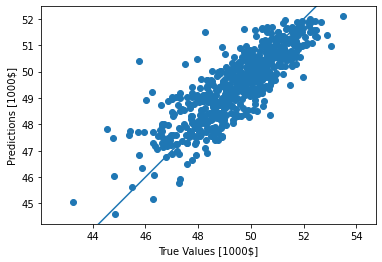

In [8]:
test_predictions = model.predict(test_features)

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

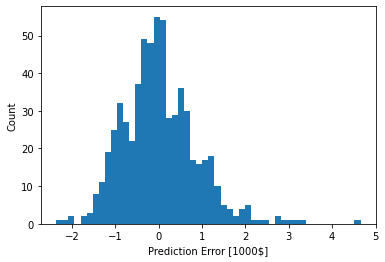

In [9]:
# histogram
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [1000$]")
_ = plt.ylabel("Count")

In [10]:
mse = mean_squared_error(test_labels, test_predictions)
print(f'the mse is {mse}')

the mse is 0.7271536176752926


In [11]:
def plot_feature_importance(importance, names):
    '''
    this code is from here: 
    https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
    '''
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

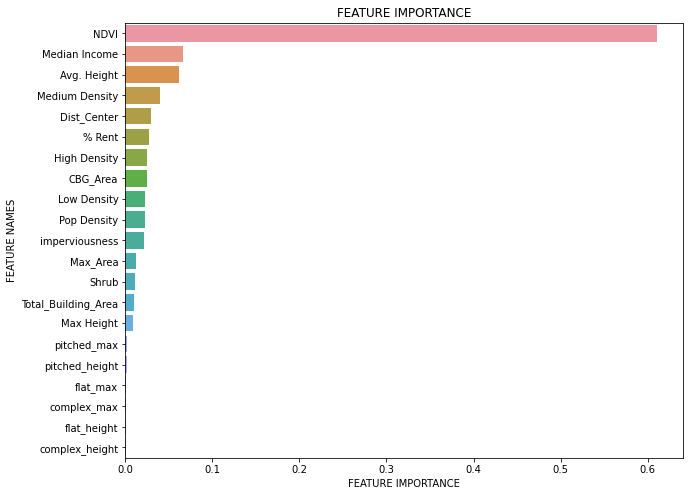

In [12]:
plot_feature_importance(model.feature_importances_, df.columns)